# Tutorial 3: Cleaning and Wrangling Data

### Lecture and Tutorial Learning Goals:

After completing this week's lecture and tutorial work, you will be able to:

* define the term "tidy data"
* discuss the advantages and disadvantages of storing data in a tidy data format
* recall and use the following tidyverse functions and operators for their intended data wrangling tasks:
    - `select`
    - `filter`
    - `%>%`
    - `map`
    - `mutate`
    - `summarize`
    - `group_by`
    - `pivot_longer`
    - `pivot_wider`
    - `%in%`


Any place you see `...`, you must fill in the function, variable, or data to complete the code. Replace `fail()` with your completed code and run the cell!

In [258]:
### Run this cell before continuing. 
library(repr)
library(tidyverse)
source("tests_tutorial_03.R")
source("cleanup_tutorial_03.R")
options(repr.matrix.max.rows = 6) #limits output of dataframes to 6 rows

**Question 0.1** 
<br> {points: 1}

Match the following definitions with the corresponding functions used in R:

A. Transforms the input by applying a function to each element and returning a vector the same length as the input.

B. Reads files that have columns separated by tabs. 

C. Most data operations are done on groups defined by variables. This function takes an existing data set and converts it into a grouped data set where operations are performed "by group". 

D. Works in an analogous way to mutate, except instead of adding columns to an existing data frame, it creates a new data frame.

E. "lengthens" data, increasing the number of rows and decreasing the number of columns.

F. Labels the x-axis. 


*Functions*

1. `group_by`
2. `map`
3. `read_tsv`
4. `summarise`
5. `xlab`
6. `pivot_longer`

For every description, create an object using the letter associated with the definition and assign it to the corresponding number from the list of functions. For example: 
```
A <- 1
B <- 2
C <- 3
...
F <- 6
```


In [259]:
# Replace the fail() with your answer. 

# your code here
A <- 2
B <- 3
C <- 1
D <- 4
E <- 6
F <- 5

In [260]:
test_0.1()

[1] "Success!"


## 1. Historical Data on Avocado Prices 
In the tutorial, we will be finishing off our analysis of the avocado data set. 

You might recall from the lecture that millennials LOVE avocado toast. However, avocados are expensive and this is costing millennials a lot more than you think (joking again 😉, well mostly...). To ensure that they can save enough to buy a house, it would be beneficial for an avocado fanatic to move to a city with low avocado prices. From Worksheet 3 we saw that the price of the avocados is less in the months between December and May, but we still don't know which region contains the cheapest avocados. 

<img align="left" src="https://media.giphy.com/media/8p3ylHVA2ZOIo/giphy.gif" width="200"/>

*image source: https://media.giphy.com/media/8p3ylHVA2ZOIo/giphy.gif*


As a reminder, here are some relevant columns in the dataset:

- `average_price` - The average price of a single avocado.
- `type` - conventional or organic
- `year` - The year
- `region` - The city or region of the observation
- `small_hass_volume`	
- `large_hass_volume`	
- `extra_l_hass_volume`	

Additionally, the last three columns can be used to calculate `total_volume` in pounds (lbs). The goal for today is to find the region with the cheapest avocados and then produce a plot of the total number of avocados sold against the average price per avocado **(in US dollars)** for that region. To do this, you will follow the steps below. 

1. use a tidyverse `read_*` function to load the csv file into your notebook
2. use `group_by + summarize` to find the region with the cheapest avocados. 
3. use `filter` to specifically look at data from the region of interest. 
4. use `mutate` to add up the volume for all types of avocados (small, large, and extra)
5. use `ggplot` to create our plot of volume vs average price


**Question 1.1** 
<br> {points: 1}

Read the file `avocado_prices.csv` found in the `tutorial_03` directory using a relative path. 

*Assign your answer to an object called `avocado`.* 

In [261]:
# your code here
avocado <- read_csv("data/avocado_prices.csv")
avocado

Parsed with column specification:
cols(
  Date = col_date(format = ""),
  average_price = col_double(),
  small_hass_volume = col_double(),
  large_hass_volume = col_double(),
  extra_l_hass_volume = col_double(),
  type = col_character(),
  yr = col_double(),
  region = col_character(),
  wk = col_double()
)



Date,average_price,small_hass_volume,large_hass_volume,extra_l_hass_volume,type,yr,region,wk
<date>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>
2015-12-27,1.33,1036.74,54454.85,48.16,conventional,2015,Albany,52
2015-12-20,1.35,674.28,44638.81,58.33,conventional,2015,Albany,51
2015-12-13,0.93,794.70,109149.67,130.50,conventional,2015,Albany,50
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
2018-01-21,1.87,1191.92,2452.79,727.94,organic,2018,WestTexNewMexico,3
2018-01-14,1.93,1527.63,2981.04,727.01,organic,2018,WestTexNewMexico,2
2018-01-07,1.62,2894.77,2356.13,224.53,organic,2018,WestTexNewMexico,1


In [262]:
test_1.1()

[1] "Success!"


**Question 1.2** 
<br> {points: 1}

Now find the region with the cheapest avocados in 2018. To do this, calculate the average price for each region. Your answer should be the row from a data frame with the lowest average price. The data frame you create should have two columns, one named `region` that has the region, and the other that contains the average price for that region.

*Assign your answer to an object called `cheapest`.*

> Hint:  You can use the function `slice` to provide a row index (or range of row indices) to numerically subset rows from a data frame. For example, to subset the 5th row of a data frame you would type: 
>
>```
>dataframe %>% 
>    slice(5)
>```



In [263]:
cheapest <- filter(avocado, yr == 2018) %>%
   group_by(region) %>%
   summarize(average_price_region=mean(average_price)) %>%
   arrange(average_price_region) %>% 
   slice(1)

# your code here
cheapest

`summarise()` ungrouping output (override with `.groups` argument)



region,average_price_region
<chr>,<dbl>
Houston,1.042083


In [264]:
test_1.2()

[1] "Success!"


**Question 1.3**
<br> {points: 1}

Now we will plot the total volume against average price for the cheapest region and all years. First, you need to mutate the data frame such that `total_volume` is equal to the addition of all three volume columns. Next, filter the dataset using the cheapest region found in **Question 1.2**. Finally, you will have the data necessary to create a scatter plot with: 

- x = `total_volume` 
- y = `average_price`

Fill in the `...` in the cell below. Copy and paste your finished answer and replace the `fail()`. We will be scaling the axes - the function is added in the scaffolding for you. 

*Assign your answer to an object called `avocado_plot`.* 

> Hint: Do not forget units on your data visualization! Here the price is in US dollars (USD) and the volume in pounds (lbs).

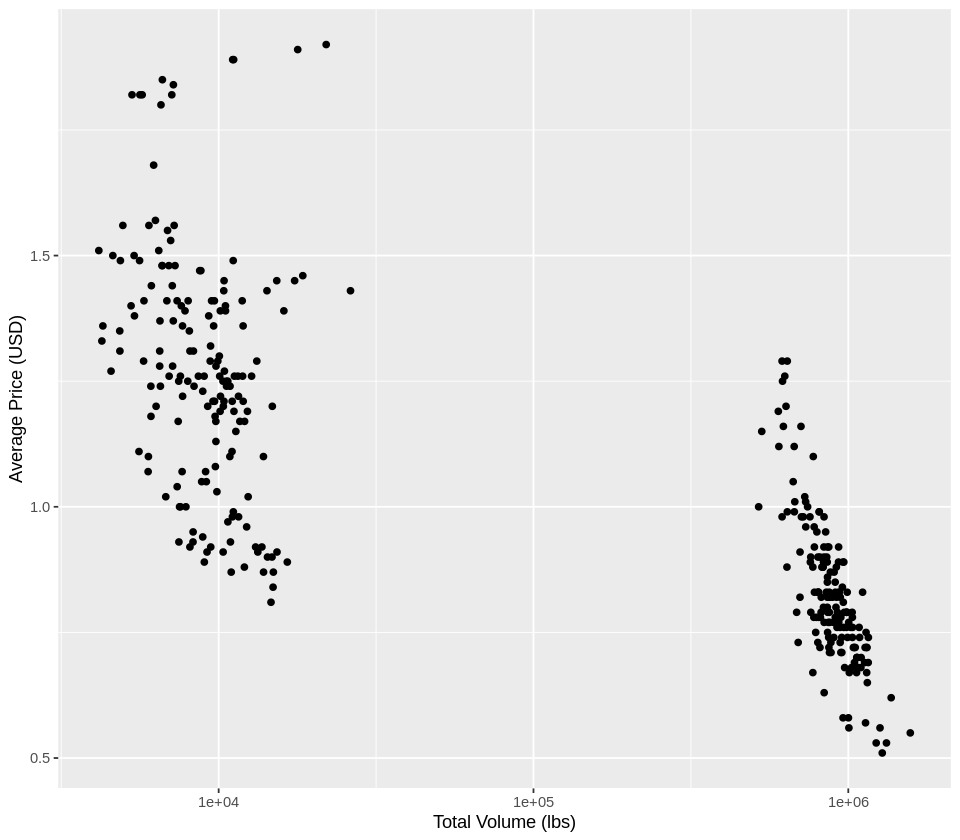

In [265]:
options(repr.plot.width = 8, repr.plot.height = 7)

avocado_plot <- select(avocado, region, average_price, small_hass_volume, large_hass_volume, extra_l_hass_volume, type)  %>%
    mutate(total_volume = small_hass_volume + large_hass_volume + extra_l_hass_volume) %>%
    filter(region == "Houston") %>%
    ggplot(aes(x = total_volume, y = average_price)) + 
        geom_point() + 
        xlab("Total Volume (lbs)") +
        ylab("Average Price (USD)") +
        scale_x_log10()

# your code here
# fail() # No Answer - remove if you provide an answer
avocado_plot

In [266]:
test_1.3()

[1] "Success!"


**Question 1.4** 

What do you notice? Discuss your plot with the person next to you.

To further investigate this trend, let's colour the data points to see if the type of avocado (either organic or not, which is called conventional in this data set) affects the volume and price of avocados sold in our region of interest. 

Run the cell below to colour the data points by avocado type. 

In [267]:
#run this cell to set plot width/height
#change the numbers below if the plot doesn't fit on your screen and run again!

options(repr.plot.width = 8, repr.plot.height = 6)

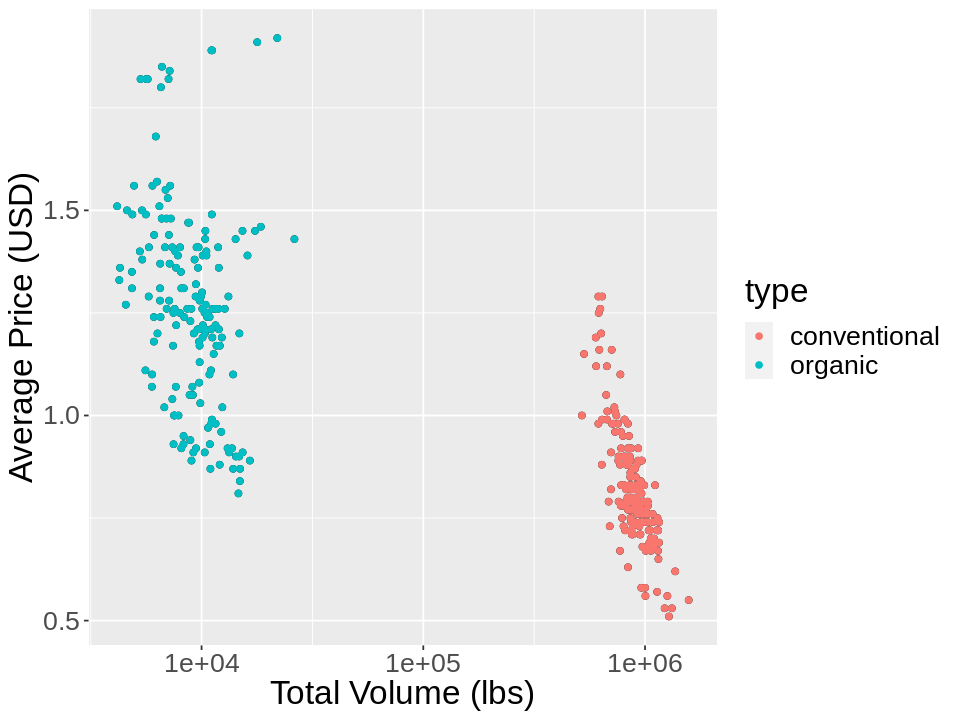

In [268]:
# Run this cell to see if avocado type (the type variable) plays a role in production and price. 

avocado_plot <- avocado_plot + 
    geom_point(aes(colour = type)) +
    theme(text = element_text(size = 20))
avocado_plot

**Question 1.4 (Continued)**
<br> {points: 3}

In 2-3 sentences, describe what you see in the graph above. Comment specifically on whether there is any evidence/indication that avocado type might influence price? 

*Hint: Make sure to include information about volume, average price, and avocado type in your answer.*

Avocado type seems to have some influence on price. Organic avocados are sold in less volume but at a higher price compared to conventional avocados. Less demand/sales for the organic type could result in higher prices as fewer organic avocados are being produced.

The plot clearly shows that organic avocados generally have a higher average price compared to conventional. Organic avocados also have less total volume in sales. The cheapest conventional avocado price is around 0.50 USD, while the cheapest organic avocado price is around 0.75 USD. 

## 2. Historical Data on Avocado Prices (Continued)
**Question 2.1**
<br> {points: 3}

Now that we know the region that sold the cheapest avocados (on average) in 2018, which region sold the most expensive avocados (on average) in 2018? And for that region, what role might avocado type play in sales? Repeat the analysis you did above, but now apply it to investigate the region which sold the most expensive avocados (on average) in 2018. 

Remember: we are finding the region that sold the most expensive avocados *in 2018*, but then producing a scatter plot of average price versus total volume sold *for all years*.

Name your plot object `priciest_plot`.

`summarise()` ungrouping output (override with `.groups` argument)



region,average_price_region
<chr>,<dbl>
Houston,1.042083


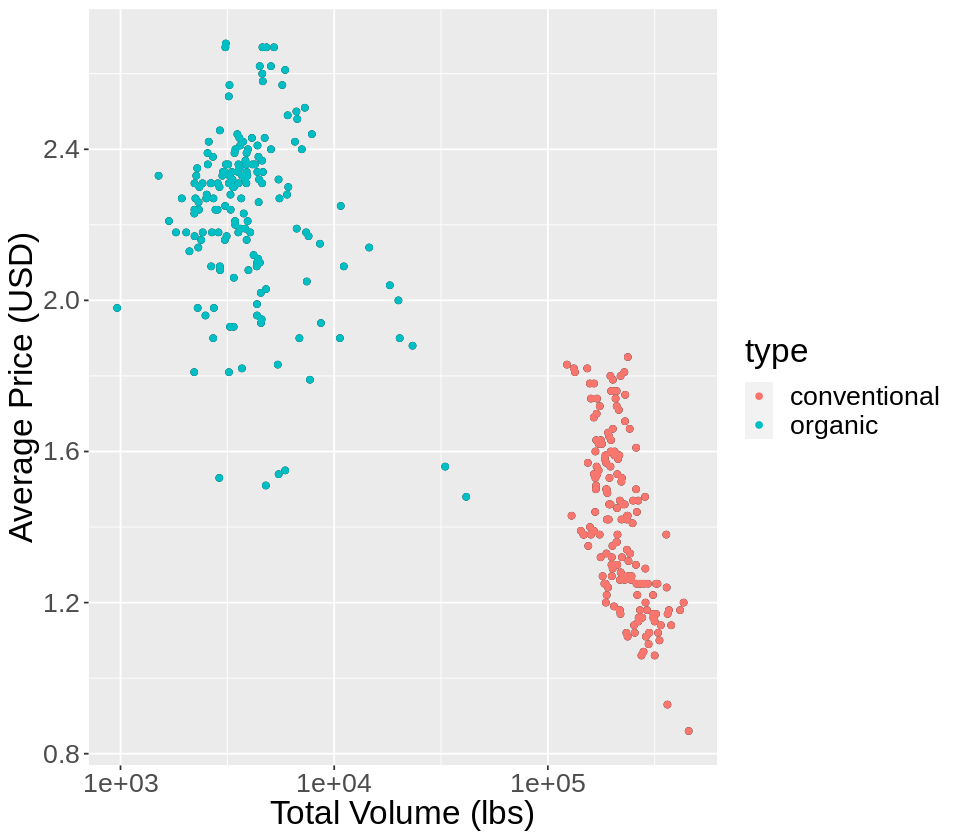

In [269]:
# your code here
priciest <- filter(avocado, yr == 2018) %>%
   group_by(region) %>%
   summarize(average_price_region=mean(average_price)) %>%
   arrange(average_price_region) %>% 
   slice(1)


options(repr.plot.width = 8, repr.plot.height = 7)

priciest_plot <- select(avocado, region, average_price, small_hass_volume, large_hass_volume, extra_l_hass_volume, type)  %>%
    mutate(total_volume = small_hass_volume + large_hass_volume + extra_l_hass_volume) %>%
    filter(region == "HartfordSpringfield") %>%
    ggplot(aes(x = total_volume, y = average_price)) + 
        geom_point() + 
        xlab("Total Volume (lbs)") +
        ylab("Average Price (USD)") +
        scale_x_log10()

priciest_plot <- priciest_plot + 
    geom_point(aes(colour = type)) +
    theme(text = element_text(size = 20))

priciest
priciest_plot

In [270]:
# check that plot has the correct name
test_that('scatter plot should be named priciest_plot', {
    expect_true(exists('priciest_plot'))
})
print('plot has correct name')
# The remainder of the tests were intentionally hidden so that you can practice deciding 
# when you have the correct answer.

[1] "plot has correct name"


**Question 2.2**
<br> {points: 3}

In 2-3 sentences, describe what you see in the graph above for the region with the most expensive avocados (on average). Comment specifically on whether there is any evidence/indication that avocado type might influence price.

Hint: Make sure to include information about volume, average price, and avocado type in your answer.

There seems to be some indication that avocadeo type influences price. The cheaper conventional avocados are sold at a much lower average price compared to the organic ones. The data points for conventional avocados are all scattered in the bottom right, while the data points for organic ones are scattered generally in the top left.

**Question 2.3**
<br> {points: 3}

Plot the scatterplots for the two regions so that they are in adjacent cells (so it is easier for you to compare them). Compare the price and volume data across the two regions. Then argue for or against the following hypothesis:

"*the region that has the cheapest avocados has them because it sells less of the organic (expensive) type of avocados compared to conventional cheaper ones.*"

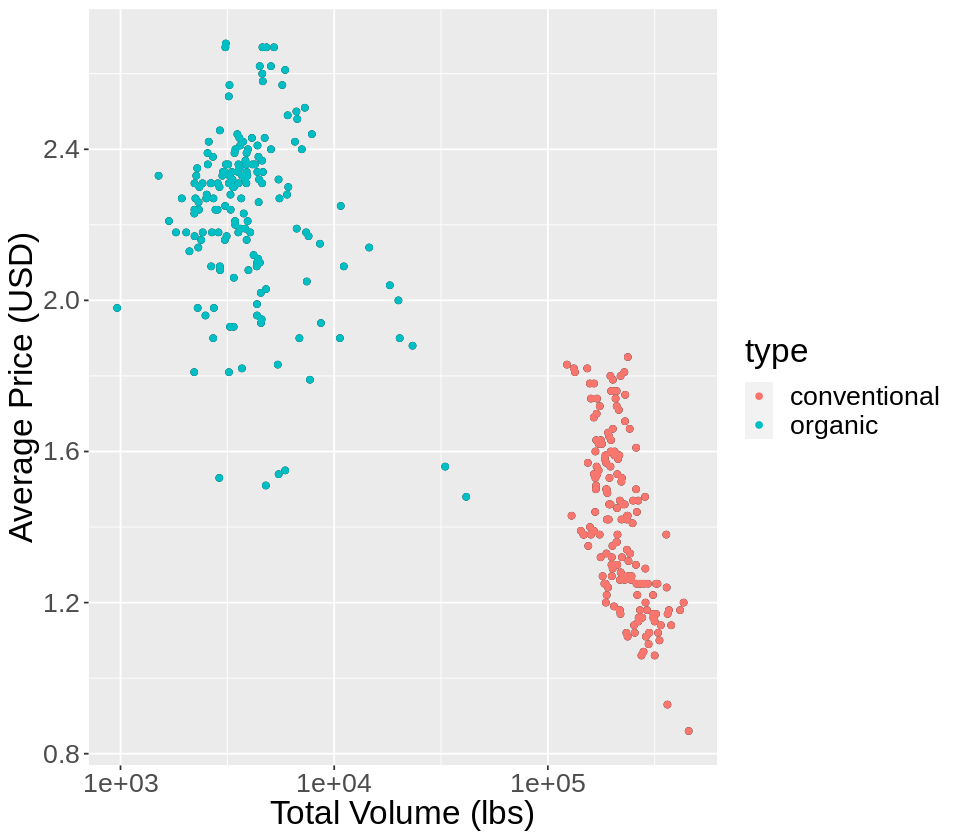

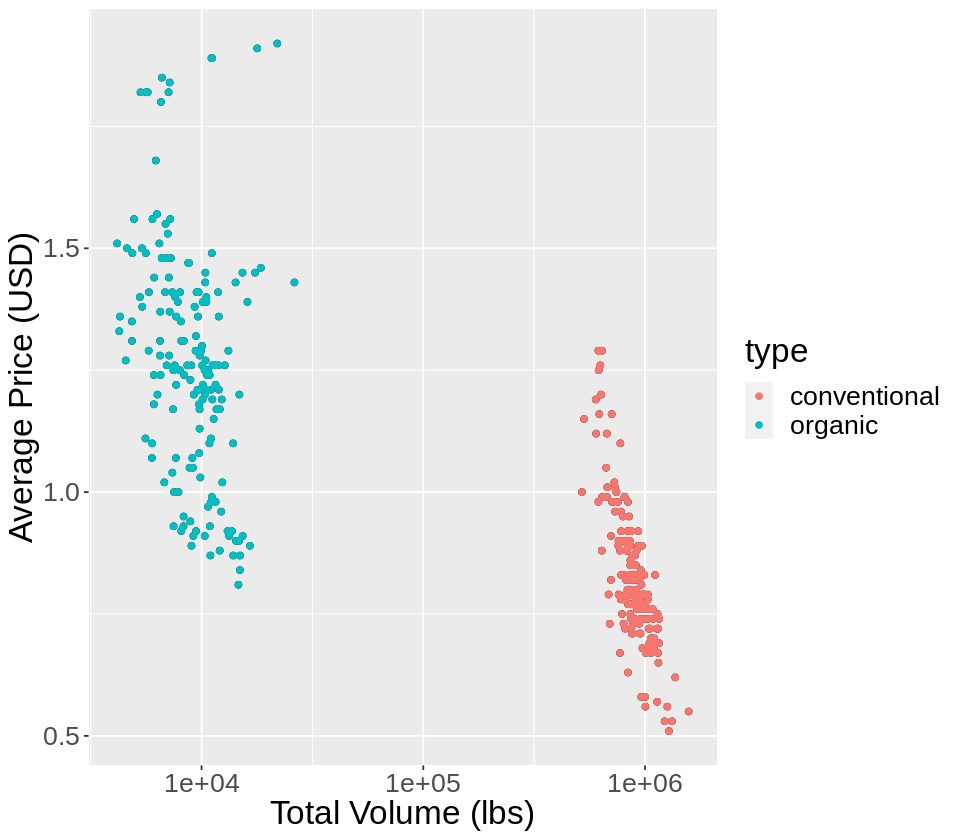

In [271]:
priciest_plot # priciest
avocado_plot # cheapest

I do not believe this hypothesis is true. 

In the plot with the cheapest avocados, most conventional avocados sold around 1e+06 lbs and most organic avocados sold around 1e+04 lbs. However, for the most expensive region, conventional avocados sold arond 1e+05.5 lbs and organic avocados sold around 1e+03.5 lbs. The difference in conventional and organic avocado volume sold is around the same for both regions, meaning the hypothesis is likely not true. 

The priciest region does have a few more data points of organic avocados that are closer to the volume of conventional avocados, but I do not believe this difference is significant enough to cause the hypothesis to be true.

## 3. Sea Surface Salinity in Departure Bay
As mentioned in this week's Worksheet, Canada's Department of Fisheries and Oceans (DFO) compiled environmentally essential data from 1914 to 2018. The data was collected at the Pacific Biological Station (Departure Bay). Daily sea surface temperature (degrees Celsius) and salinity (practical salinity units, PSU)observations have been carried out at several locations on the coast of British Columbia. The number of stations reporting at any given time has varied as sampling has been discontinued at some stations, and started or resumed at others.

In **Worksheet 3** we already worked with the temperature observations. Now, we will be focusing on salinity! Specifically, we want to see if the monthly maximum salinity has been changing over the years. We will only be focusing our attention on the winter months December, January and February. 

**Question 3.1**
<br> {points: 1}

To begin working with this data, read the file `max_salinity.csv` into R. Note, this file (just like the avocado data set) is found within the `tutorial_03` folder. 

*Assign your answer to an object called `sea_surface`.* 

In [272]:
# your code here
sea_surface <- read_csv("data/max_salinity.csv")
sea_surface

Parsed with column specification:
cols(
  Year = col_double(),
  Jan = col_double(),
  Feb = col_double(),
  Mar = col_double(),
  Apr = col_double(),
  May = col_double(),
  Jun = col_double(),
  Jul = col_double(),
  Aug = col_double(),
  Sep = col_double(),
  Oct = col_double(),
  Nov = col_double(),
  Dec = col_double()
)



Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1914,27.7,NA,NA,NA,NA,NA,NA,NA,27.4,28.4,26.6,27.1
1915,27.1,26.8,28.1,28.1,28.6,28.8,30.2,30.8,28.5,28.7,27.6,27.5
1916,27.6,27.1,27.2,27.5,28.0,29.0,25.0,27.0,28.3,28.0,27.3,27.1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
2016,27.8,26.4,26.1,26.8,26.5,26.4,26.0,27.6,27.6,28.5,24.7,27.3
2017,28.0,27.9,28.2,26.1,26.7,26.9,25.4,26.7,27.6,28.7,27.7,27.4
2018,27.3,27.3,29.0,29.3,NA,NA,NA,NA,NA,NA,NA,NA


In [273]:
test_3.1()

[1] "Success!"


**Question 3.2**
<br> {points: 3}

Given that `ggplot` prefers tidy data, we must tidy the data! Use the `pivot_longer()` function to create a tidy data frame with three columns: `Year`, `Month` and `Salinity`. Remember we only want to look at the winter months (December, January and February) so don't forget to reduce the data to just those three!

*Assign your answer to an object called `max_salinity`.*

In [289]:
max_salinity <- sea_surface %>%
   select(Dec, Jan, Feb, Year) %>%
   pivot_longer(cols = -Year,
                names_to = 'month',
                values_to = 'salinity') 

# your code here
# fail() # No Answer - remove if you provide an answer
max_salinity

Year,month,salinity
<dbl>,<chr>,<dbl>
1914,Dec,27.1
1914,Jan,27.7
1914,Feb,NA
⋮,⋮,⋮
2018,Dec,NA
2018,Jan,27.3
2018,Feb,27.3


In [290]:
# check that data frame has the correct name
test_that('data frame should be named max_salinity', {
    expect_true(exists('max_salinity'))
})
print('data frame has correct name')
# The tests were intentionally hidden so that you can practice deciding 
# when you have the correct answer.

[1] "data frame has correct name"


**Question 3.3** 
<br> {points: 3}

Now that we've created new columns, we can finally create our plot that compares the maximum salinity observations to the year they were recorded. As usual, label your axes!

*Assign your answer to an object called `max_salinity_plot`.*

> Hint: do not forget to add units to your axes! Remember from the data description that salinity is measured in practical salinity units (PSU).

Warning message:
“Removed 23 rows containing missing values (geom_point).”


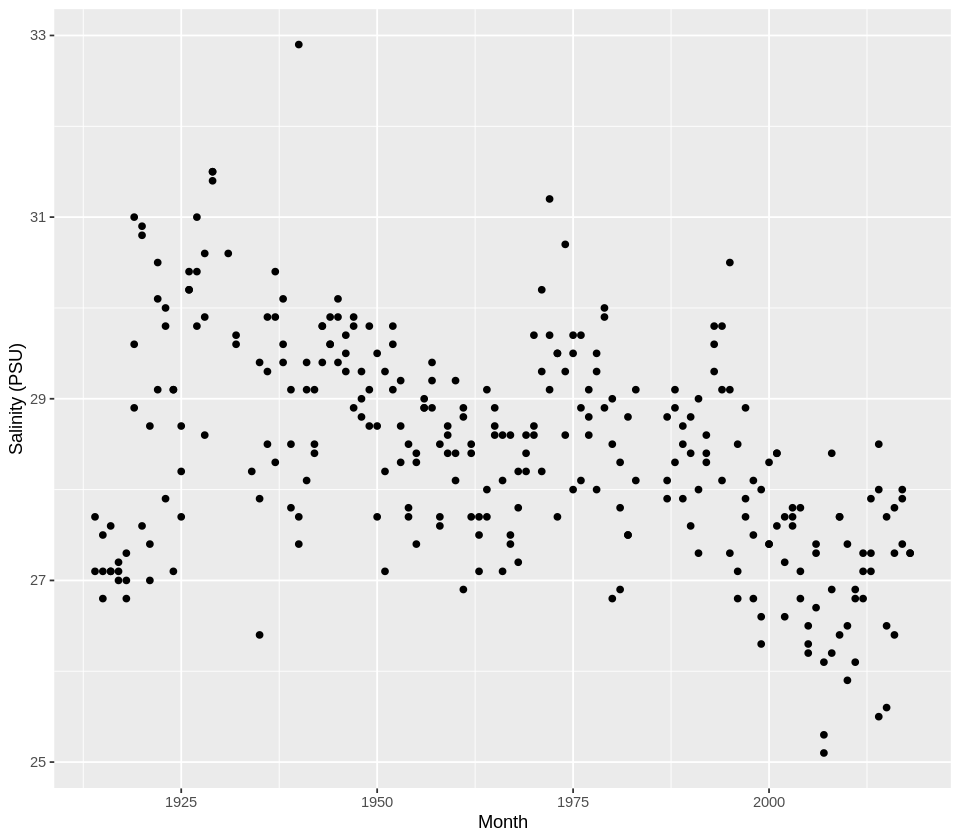

In [276]:
# your code here
max_salinity_plot <- max_salinity %>%
    ggplot(aes(x = Year, y = salinity)) + 
        geom_point() + 
        xlab("Month") +
        ylab("Salinity (PSU)")
#         scale_x_log10()
max_salinity_plot

In [277]:
# check that plot has the correct name
test_that('scatter plot should be named max_salinity_plot', {
    expect_true(exists('max_salinity_plot'))
})
print('plot has correct name')
# The tests were intentionally hidden so that you can practice deciding 
# when you have the correct answer.

[1] "plot has correct name"


**Question 3.4**
<br> {points: 3}

In 1-2 sentences, describe what you see in the graph above. Comment specifically on whether there is a change in salinity across time for the winter months and if there is, whether this indicates a postive or a negative relationship for these variables within this data set. If there is a relationship, also comment on its strength and linearity.

There is a weak negative relationship in the graph above. As the years increase, the salinity tends to decrease.

## 4. Pollution in Madrid
The goal of this analysis (which we started in `worksheet_03`) is to see if pollutants are decreasing (is air quality improving) and also determine which pollutant has decreased the most over the span of 5 years (2001 - 2006). In `worksheet_03` we investigated what happened with the maximum values of each pollutant over time, now we will investigate the average values of each pollutant over time. To do this we will:

1. Calculate the average monthly value for each pollutant for each year. 
2. Create a scatter plot for the average monthly value for each month. Plot these values for each pollutant and each year so that a trend over time for each pollutant can be observed.
3. Now we will look at which pollutant decreased the most between 2001 - 2006 when we look at the average instead of the maximum values.

**Question 4.1** 
<br> {points: 3}

To begin working with this data, read the file `madrid_pollution.csv`. Note, this file (just like the other data sets in this tutorial) is found in the `tutorial_03` directory. 

*Assign your answer to an object called `madrid`.* 

In [278]:
# your code here
madrid <- read_tsv("data/madrid_pollution.csv")
madrid

Parsed with column specification:
cols(
  date = col_datetime(format = ""),
  BEN = col_double(),
  CO = col_double(),
  EBE = col_double(),
  MXY = col_double(),
  NMHC = col_double(),
  NO_2 = col_double(),
  NOx = col_double(),
  OXY = col_double(),
  O_3 = col_double(),
  PM10 = col_double(),
  PXY = col_double(),
  SO_2 = col_double(),
  TCH = col_double(),
  TOL = col_double(),
  year = col_double(),
  month = col_character()
)



date,BEN,CO,EBE,MXY,NMHC,NO_2,NOx,OXY,O_3,PM10,PXY,SO_2,TCH,TOL,year,month
<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
2001-08-01 01:00:00,1.50,0.34,1.49,4.10,0.07,56.25,75.17,2.11,42.16,100.60,1.73,8.11,1.24,10.82,2001,August
2001-08-01 02:00:00,0.87,0.06,0.88,2.41,0.01,29.71,31.44,1.20,56.52,56.29,1.02,6.90,1.17,6.49,2001,August
2001-08-01 03:00:00,0.66,0.02,0.61,1.60,0.01,22.75,22.46,0.80,64.06,36.65,0.69,6.59,1.17,6.37,2001,August
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
2006-04-30 22:00:00,0.88,0.52,0.66,1.71,0.24,87.02,93.67,0.84,21.93,66.77,0.74,6.19,1.35,2.96,2006,April
2006-04-30 23:00:00,1.24,0.57,1.03,2.58,0.24,91.36,100.40,1.29,13.17,56.61,1.14,6.34,1.36,4.97,2006,April
2006-05-01 00:00:00,1.26,0.60,1.09,2.95,0.27,98.05,129.30,1.52,9.34,45.61,1.24,6.98,1.41,5.95,2006,May


In [279]:
# check that data frame has the correct name
test_that('data frame should be named madrid', {
    expect_true(exists('madrid'))
})
print('data frame has correct name')
# The tests were intentionally hidden so that you can practice deciding 
# when you have the correct answer.

[1] "data frame has correct name"


Given that we are going to plotting months, which are dates, let's tell R how they should be ordered. We can do this by changing the month column from a character vector to a factor vector. Factors in R are useful for categorical data and they have an order.

In [280]:
# run this cell to order the column month by month (date) and not alphabetically
madrid <- madrid %>% 
    mutate(month = factor(month, levels = c('January','February','March','April',
                                            'May','June','July','August',
                                            'September','October','November','December')))

**Question 4.2**
<br> {points: 3}

Calculate the average monthly value for each pollutant for each year and store that as a data frame. Your data frame should have the following 4 columns:

1. `year`
2. `month`
3. `pollutant`
4. `monthly_avg`

Name your data frame `madrid_avg`.

In [281]:
madrid

date,BEN,CO,EBE,MXY,NMHC,NO_2,NOx,OXY,O_3,PM10,PXY,SO_2,TCH,TOL,year,month
<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
2001-08-01 01:00:00,1.50,0.34,1.49,4.10,0.07,56.25,75.17,2.11,42.16,100.60,1.73,8.11,1.24,10.82,2001,August
2001-08-01 02:00:00,0.87,0.06,0.88,2.41,0.01,29.71,31.44,1.20,56.52,56.29,1.02,6.90,1.17,6.49,2001,August
2001-08-01 03:00:00,0.66,0.02,0.61,1.60,0.01,22.75,22.46,0.80,64.06,36.65,0.69,6.59,1.17,6.37,2001,August
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
2006-04-30 22:00:00,0.88,0.52,0.66,1.71,0.24,87.02,93.67,0.84,21.93,66.77,0.74,6.19,1.35,2.96,2006,April
2006-04-30 23:00:00,1.24,0.57,1.03,2.58,0.24,91.36,100.40,1.29,13.17,56.61,1.14,6.34,1.36,4.97,2006,April
2006-05-01 00:00:00,1.26,0.60,1.09,2.95,0.27,98.05,129.30,1.52,9.34,45.61,1.24,6.98,1.41,5.95,2006,May


In [282]:
# your code here
madrid_avg <- madrid %>%
    pivot_longer(cols = BEN:TOL, names_to = "pollutant", values_to="values") %>%
    group_by(year, month, pollutant) %>% summarize(monthly_avg = mean(values, na.rm = TRUE))

madrid_avg
    

`summarise()` regrouping output by 'year', 'month' (override with `.groups` argument)



year,month,pollutant,monthly_avg
<dbl>,<fct>,<chr>,<dbl>
2001,January,BEN,3.323096
2001,January,CO,1.305626
2001,January,EBE,2.833943
⋮,⋮,⋮,⋮
2006,December,SO_2,9.980000
2006,December,TCH,NaN
2006,December,TOL,8.039344


In [283]:
# check that data frame has the correct name
test_that('data frame should be named madrid_avg', {
    expect_true(exists('madrid_avg'))
})
print('data frame has correct name')
# The tests were intentionally hidden so that you can practice deciding 
# when you have the correct answer.

[1] "data frame has correct name"


**Question 4.3**
<br> {points: 3}

Create a scatter plot for the average monthly value for each month. Plot these values for each pollutant and each year so that a trend over time for each pollutant can be observed. To do this all in one plot, you are going to want to use a `facet_grid` layer (makes subplots within one plot when data are "related") and a `theme` layer (to adjust the angle of the text on the x-axis. We provide you with the code for these two layers in the scaffolding for this plot.

Warning message:
“Removed 10 rows containing missing values (geom_point).”


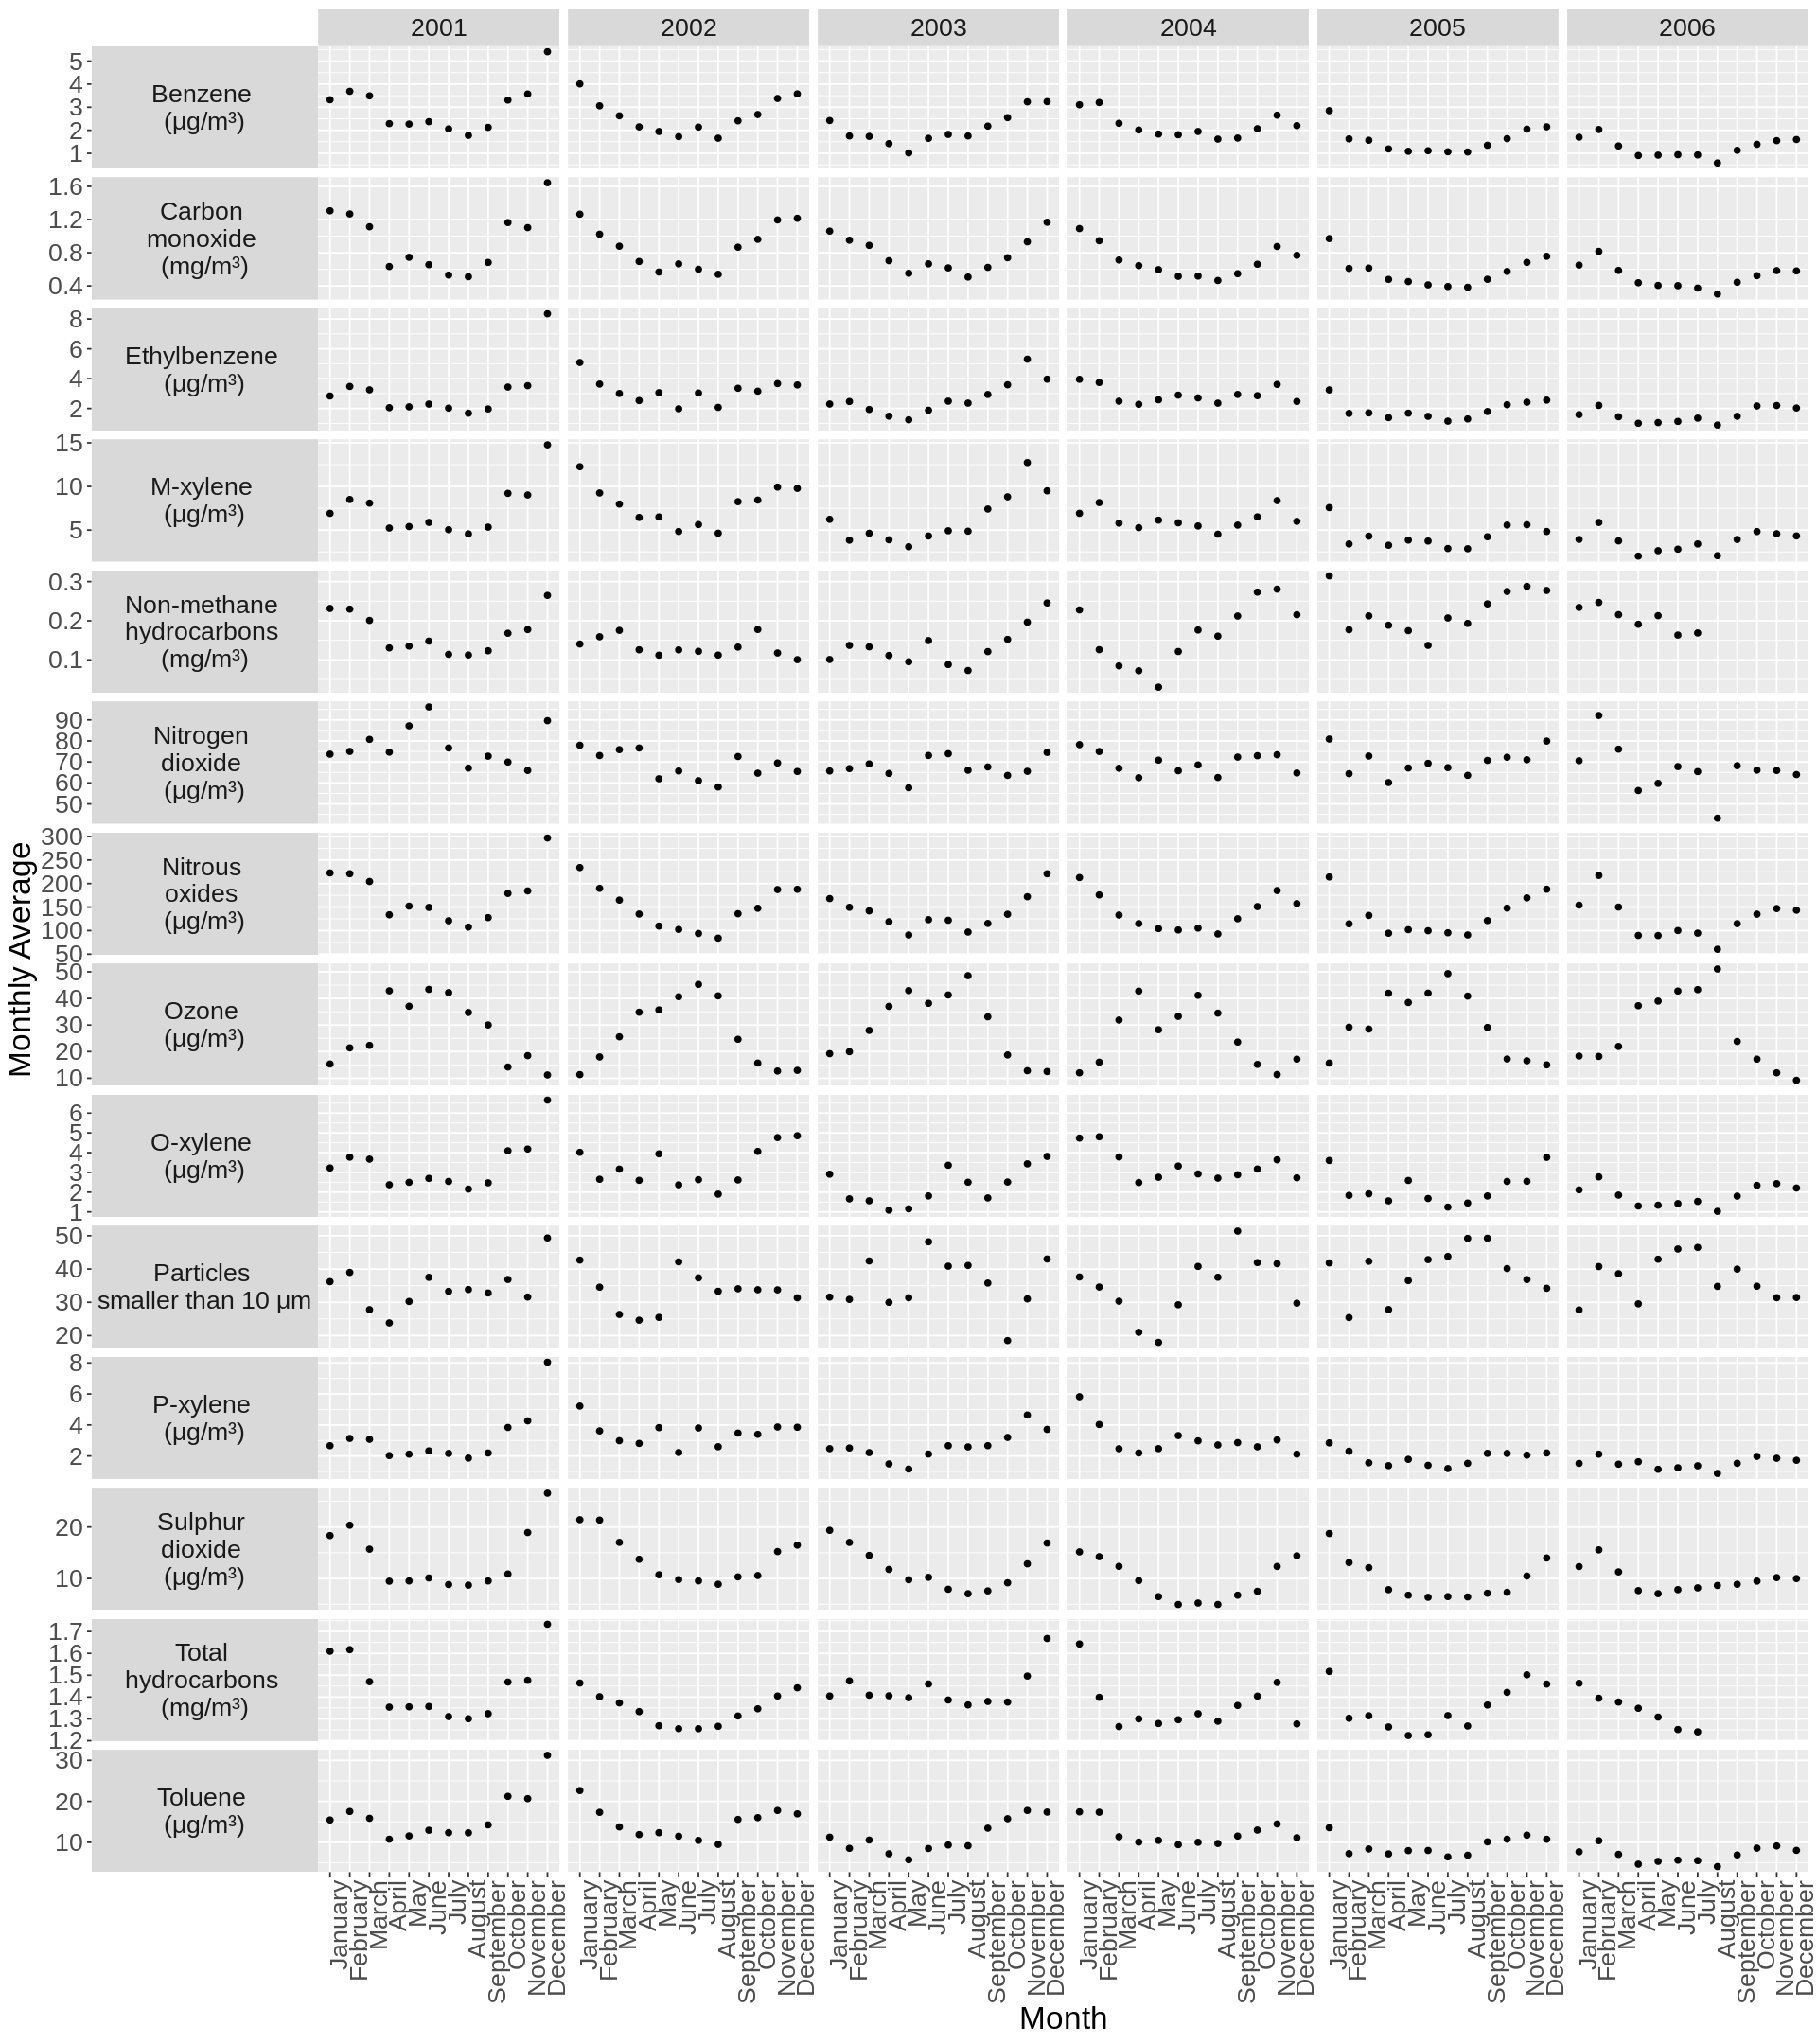

In [284]:
options(repr.plot.width = 16, repr.plot.height = 18)
pollutant_labels <- c(BEN = "Benzene \n(μg/m³)", 
                   CO = "Carbon \nmonoxide \n(mg/m³)", 
                   EBE = "Ethylbenzene \n(μg/m³)",
                   MXY = "M-xylene \n(μg/m³)", 
                   NMHC = "Non-methane \nhydrocarbons \n(mg/m³)",
                   NO_2 = "Nitrogen \ndioxide \n(μg/m³)",
                   NOx = "Nitrous \noxides \n(μg/m³)",
                   O_3 = "Ozone \n(μg/m³)",
                   OXY = "O-xylene \n(μg/m³)",
                   PM10 = "Particles \nsmaller than 10 μm",
                   PXY = "P-xylene \n(μg/m³)",
                   SO_2 = "Sulphur \ndioxide \n(μg/m³)",
                   TCH = "Total \nhydrocarbons \n(mg/m³)",
                   TOL = "Toluene \n(μg/m³)")

madrid_avg_plot <- madrid_avg %>%
   ggplot(aes(x = month, y = monthly_avg)) + 
   geom_point() +
   xlab("Month") + 
   ylab("Monthly Average") +
   facet_grid(pollutant ~ year, scales = "free",
              switch = "y", 
              labeller = labeller(pollutant = pollutant_labels)) +
   theme(axis.text.x = element_text(angle = 90, hjust = 1),
        strip.text.y.left = element_text(angle = 0),
        text = element_text(size = 20))

# your code here

madrid_avg_plot

**Question 4.4**
<br> {points: 3}

By looking at the plots above, which monthly average pollutant levels appear to have decreased over time? Which appear to have increased?

Toluene, Benzene, Carbon monoxide, p-xylene, and sulphur dioxide seemed to have decreased over time. 

Non-methane hydrocarbons and particles smaller than 10 micrometers seemed to have increased over time.

**Question 4.5**
<br> {points: 3}

Now we will look at which pollutant decreased the most between 2001 - 2006 when we look at the average yearly values for each pollutant. Your final result should be a data frame that has at least these two columns: pollutant and yearly_avg_diff and one row (the most decreased pollutant when looking at yearly average between 2001 - 2006). **Make sure to use the ```madrid_avg``` data frame in your solution.**

*There are several different ways to solve this problem. My solution included using a function called `pivot_wider` which is the inverse of `pivot_longer`. If you would like to use that function, see [here](https://ubc-dsci.github.io/introduction-to-datascience/wrangling.html#going-from-long-to-wide-using-pivot_wider) for more info.*

In [285]:
pollutant_decreased_2006 <- madrid_avg %>%
filter(year == 2006) %>%
pivot_wider(names_from = "pollutant", values_from = "monthly_avg")  %>%
map_df(mean, na.rm = TRUE) %>% select(BEN:TOL)

pollutant_decreased_2001 <- madrid_avg %>%
filter(year == 2001) %>%
pivot_wider(names_from = "pollutant", values_from = "monthly_avg")  %>%
map_df(mean, na.rm = TRUE) %>% select(BEN:TOL)

diff <- pollutant_decreased_2006 - pollutant_decreased_2001

avg_year_diff <- diff %>% 
pivot_longer(cols = BEN:TOL, names_to = "pollutant", values_to = "yearly_avg") %>% arrange(desc(yearly_avg)) %>% tail(1)

avg_year_diff



Warning message in mean.default(.x[[i]], ...):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(.x[[i]], ...):
“argument is not numeric or logical: returning NA”


pollutant,yearly_avg
<chr>,<dbl>
NOx,-50.30811


**Question 4.6** 
<br> {points: 3}

Did using the average to find the most decreased pollutant between 2001 and 2006 give you the same answer as using the maximum in the worksheet? Is your answer to the previous question surprising? Explain.

Using the average did not give the same answer as the maxiumum. 

I don't think this answer is surprising as using the average is a better way of measuring decrease in pollutants. If we use the maximum, there may be some data points for some pollutants that are outliers, which can cause the answer to be different. It seems better to measure the change over time, like we are with the average, compared to just one maximum data point. 

**Optional Question** 
<br>(for fun and does not count for grades):

Consider doing the same analysis as you did for Question 4.5, except this time calculate the difference as a percent or fold difference (as opposed to absolute difference as we did in Question 4.5). The scales for the pollutants are very different, and so we might want to take this into consideration when trying to answer the question "Which pollutant decreased the most"?

In [286]:
# Your optional answer goes here

In [287]:
source("cleanup_tutorial_03.R")